In [2]:
import sys
import importlib
from termcolor import colored
import tensorflow as tf
sys.path.insert(0, "/scratch/modules")


In [3]:

#Input data loading
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

datasetPath = "/scratch/modules/gzip"

lastClassNumber = emnist_fcn.lastClassNumber
datasetName = "emnist-byclass-train"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Training dataset","green"))
x_train, y_train = emnist_fcn.preprocessData(x,y)
datasetName = "emnist-byclass-test"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Test dataset","green"))
x_test, y_test = emnist_fcn.preprocessData(x,y)

Training dataset
Test dataset


2025-04-15 09:28:02.828212: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: UNKNOWN ERROR (34)
2025-04-15 09:28:07.326266: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 418650512 exceeds 10% of free system memory.


Epoch 1/10
8344/8344 [==============================] - 52s 6ms/step - loss: 0.5009 - Accuracy: 0.8445
Epoch 2/10
8344/8344 [==============================] - 48s 6ms/step - loss: 0.2816 - Accuracy: 0.8994
Epoch 3/10
8344/8344 [==============================] - 51s 6ms/step - loss: 0.2596 - Accuracy: 0.9059
Epoch 4/10
8344/8344 [==============================] - 50s 6ms/step - loss: 0.2563 - Accuracy: 0.9069
Epoch 5/10
8344/8344 [==============================] - 54s 6ms/step - loss: 0.2558 - Accuracy: 0.9071
Epoch 6/10
8344/8344 [==============================] - 54s 6ms/step - loss: 0.2558 - Accuracy: 0.9071
Epoch 7/10
8344/8344 [==============================] - 49s 6ms/step - loss: 0.2558 - Accuracy: 0.9071
Epoch 8/10
8344/8344 [==============================] - 50s 6ms/step - loss: 0.2558 - Accuracy: 0.9071
Epoch 9/10
8344/8344 [==============================] - 50s 6ms/step - loss: 0.2558 - Accuracy: 0.9071
Epoch 10/10
8344/8344 [==============================] - 51s 6ms/step - l

2025-04-15 09:36:44.595651: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 69982976 exceeds 10% of free system memory.


2790/2790 [==============================] - 10s 3ms/step - loss: 0.2815 - Accuracy: 0.8995
CPU times: user 14min 13s, sys: 6min 12s, total: 20min 26s
Wall time: 8min 52s


[0.2814629375934601, 0.899489164352417]

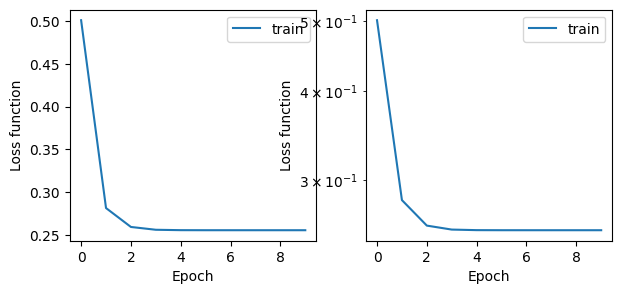

In [4]:
%%time
#model definition and training
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

inputShape = emnist_fcn.inputShape
nNeurons = emnist_fcn.nNeurons
nOutputNeurons = emnist_fcn.lastClassNumber
nEpochs = emnist_fcn.nEpochs


model = emnist_fcn.getModel(inputShape=inputShape, nOutputNeurons=nOutputNeurons,
                            nNeurons=nNeurons,
                            hiddenActivation="relu",
                            outputActivation="softmax")

model = emnist_fcn.trainModel(model, x_train, y_train, nEpochs=nEpochs)

print(colored("Evaluation on test dataset:","blue"))
model.evaluate(x_test, y_test)

2025-04-15 09:37:07.935036: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 418650512 exceeds 10% of free system memory.
2025-04-15 09:37:31.096527: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 76894992 exceeds 10% of free system memory.
2025-04-15 09:37:31.194257: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 76894992 exceeds 10% of free system memory.


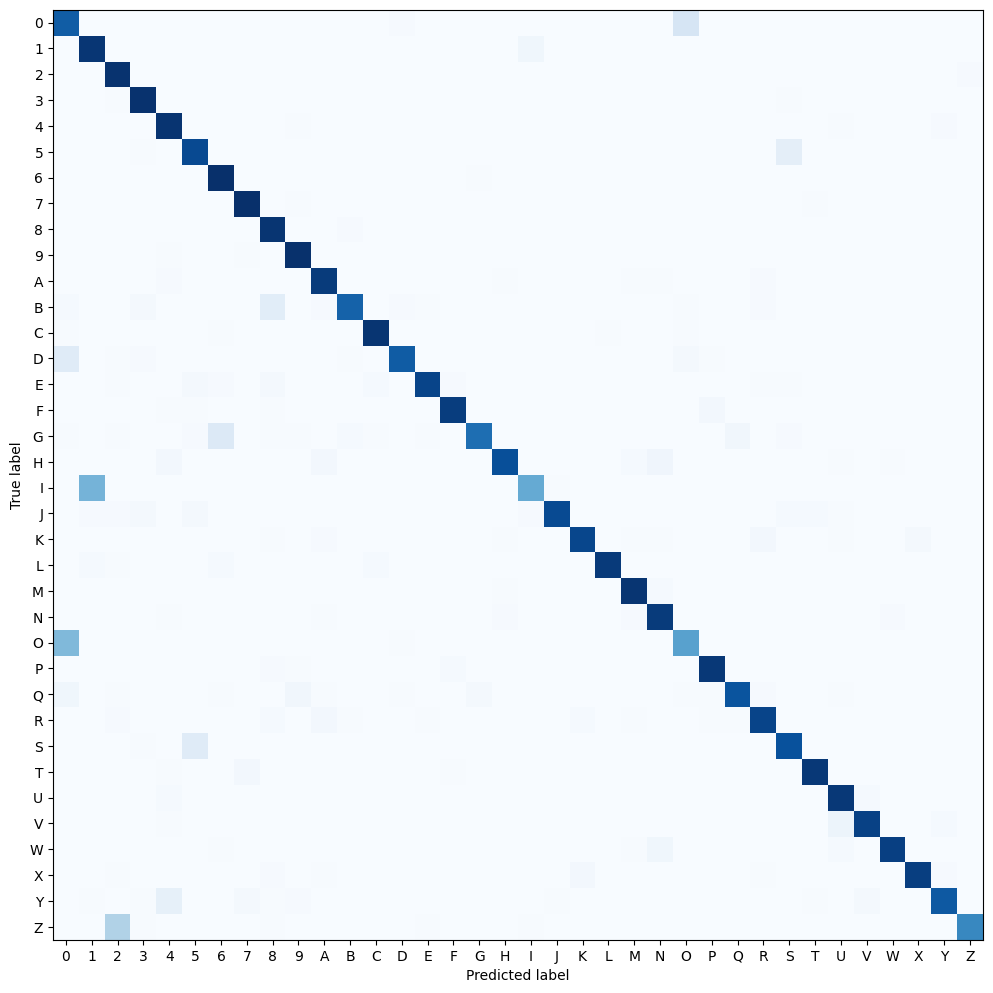

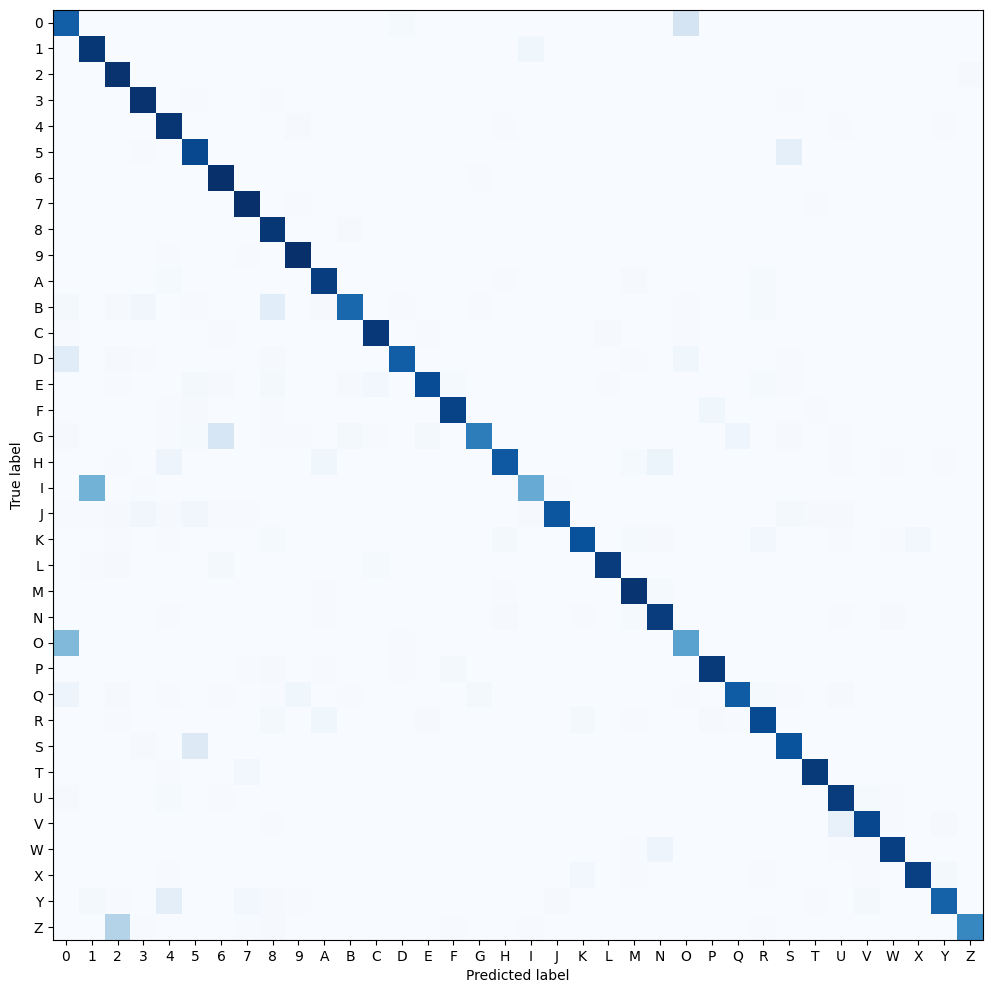

In [5]:
importlib.reload(emnist_fcn);
y_pred = tf.argmax(model.predict(x_train, batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_train, y_pred,"Training")

y_pred = tf.argmax(model.predict(x_test,batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_test, y_pred,"Testing")

1/1 [==============================] - 0s 134ms/step


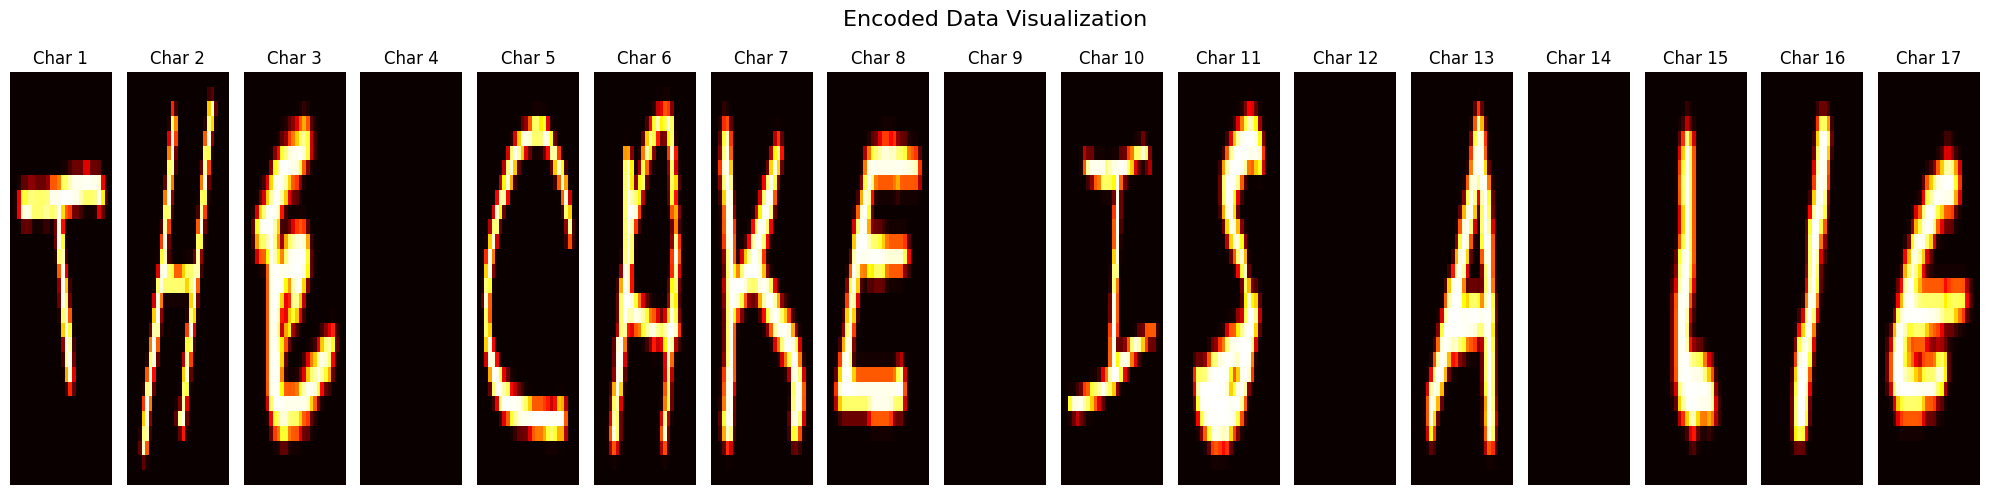

'decoded message is: THE CAKE IS A L16'

In [6]:
importlib.reload(emnist_fcn);
import numpy as np
fileName = "/scratch/modules/encoded.npz"
with open(fileName, 'rb') as file:
    encoded = np.load(file)

emnist_fcn.decodeMessage(model, encoded)

In [ ]:
"źle separują się 0 - O, 1 - I, 2 - Z, 5 - S, 6 - G"